# PCA using custom class (and sklearn!!!)

Principal Component Analysis aims to reduce the dimensionality of datasets while conserving as much variance as possible.
Dimensionality reduction may target different purposes. The most relevant are multidimensional data visualization and data clearing for ML.
Here I’ll focus on the creation of a custom PCA class based on sklearn.
As a test sample, the iris dataset will be used.
![PCA](PCA.png)

## Imports

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## defining custom PCA class


In [ ]:
class PCA_sklearn:
    # main func
    def __init__(self, data, n_components=2, target=None,colNames=None):
        self.data = data
        self.scaled_data = StandardScaler().fit_transform(self.data)
        if n_components > self.data.shape[1]:
            n_components = self.data.shape[1]
        self.n_components = n_components
        self.pca = PCA(n_components=self.n_components)
        self.principalComponents = self.pca.fit_transform(self.scaled_data)
        if (colNames != None):
            self.principalDf = pd.DataFrame(
                self.principalComponents, columns=colNames)
        else:
            self.principalDf = pd.DataFrame(
                self.principalComponents, columns=['PC'+str(i+1) for i in range(self.n_components)])

        if (type(target) != type(None)):
            self.principalDf = pd.concat([self.principalDf, pd.DataFrame(target, columns=['target'])], axis=1)
        
    # to access data
    def get_data(self):
        return self.data
    
    def get_scaled_data(self):
        return self.scaled_data

    def get_n_components(self):
        return self.n_components
    
    def get_pca(self):
        return self.pca
    
    def get_principalComponents(self):
        return self.principalComponents
    
    def get_principalDf(self):
        return self.principalDf


    def get_explained_variance(self):
        return self.pca.explained_variance_ratio_ # returns a vector of the explained variance ratio

## download sample data and define dataframes

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
features = ['sepal length','sepal width','petal length','petal width']
target = ['target']
features_target = features + target
df = pd.read_csv(url, names=features_target)
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## split data into features and target variable

In [ ]:
X = df.loc[:, features]
y = df.loc[:, target]

## apply PCA

In [ ]:
pca = PCA_sklearn(X, n_components=2, target=y,colNames=['Principal Component 1', 'Principal Component 2'])
principalDf = pca.get_principalDf()
principalDf

,Principal Component 1,Principal Component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


### check if colNames are automatically assigned

if the colNames are properly applied in class PCA_sklearn
then the following code will result in columns being named automatically PC1, PC2, PC3, PC4, ...



In [ ]:
pca = PCA_sklearn(X, n_components=2, target=y,colNames=['PC1', 'PC2'])
principalDf = pca.get_principalDf()
principalDf

,PC1,PC2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


## Plot PC1 vs PC2 to visualize data into a 2D-projected space

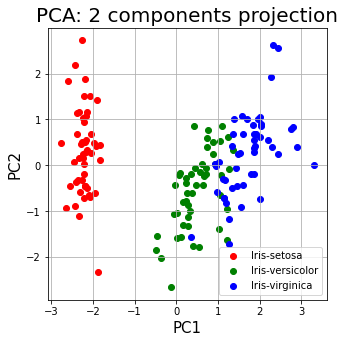

In [ ]:
plt.figure(figsize = (5 , 5))
plt.xlabel('PC1', fontsize = 15)
plt.ylabel('PC2', fontsize = 15)
plt.title('PCA: 2 components projection', fontsize = 20)

outClasses = np.unique(y) #['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for outClass, color in zip(outClasses,colors):
  ind = np.where(y["target"] == outClass)
  plt.scatter(principalDf.loc[ind, 'PC1'] 
             , principalDf.loc[ind, 'PC2']
             , c = color)
plt.legend(outClasses)  
plt.grid()

## getting the explained variance ratio

The explained variance ratio refers to the percentage of variance explained by each of the principal components, and is a measure of how much information is captured by each of the principal components.



In [ ]:
explained_variance = pca.get_explained_variance()
print("explained_variance per principal component [%]: ", np.round(explained_variance*100,decimals=2))
print("sum of explained_variance [%]: ", np.round(sum(explained_variance)*100, decimals=2))

explained_variance per principal component [%]:  [72.77 23.03]
sum of explained_variance [%]:  95.8


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ca7c41ac-cbd3-4d18-a0c8-dd5e48aa9b9b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>